In [ ]:
from time import time
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
from libla import Matrix

# Numerical Example Plot

In [2]:
X = Matrix.rand_rk(50, 20, 10)

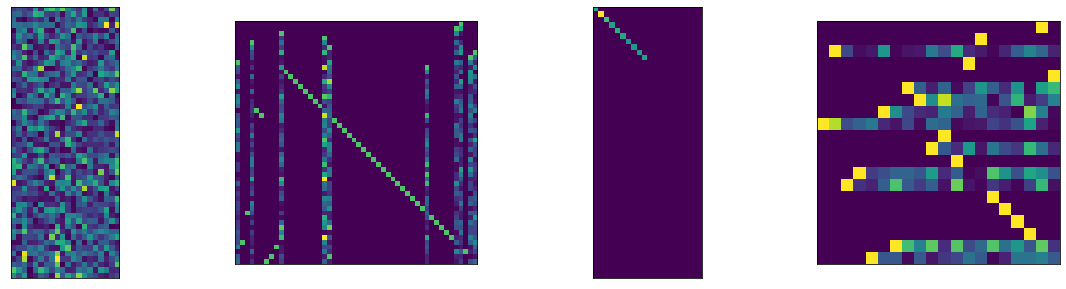

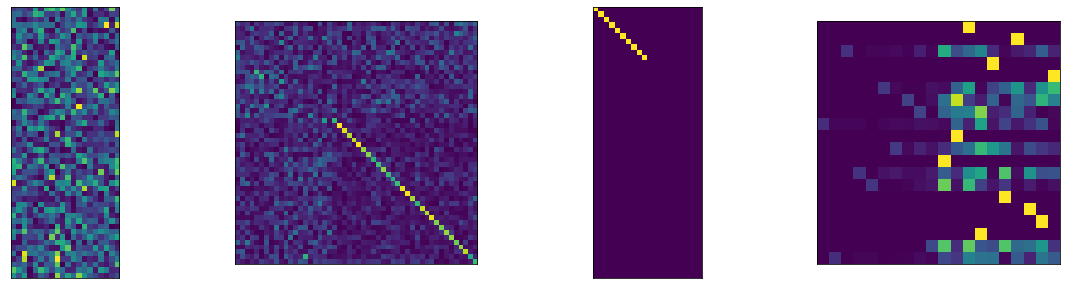

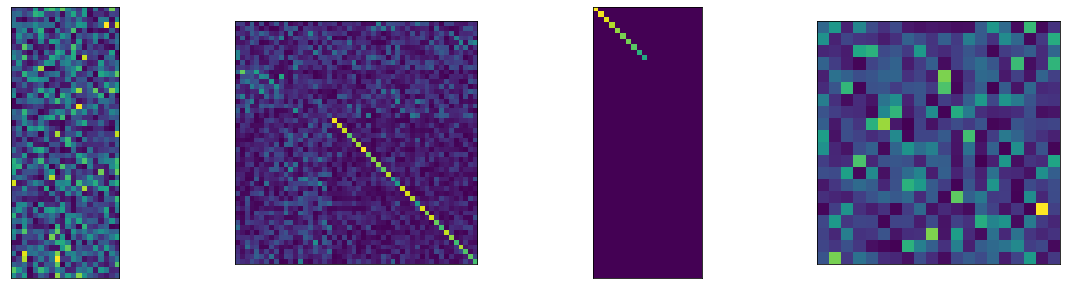

In [3]:
def show(res):
    fig, axs = plt.subplots(ncols=4,nrows=1, figsize=(20,5))
    def P(A): return np.abs(A)
    axs[0].imshow(P(X))
    axs[1].imshow(P(res.X))
    axs[2].imshow(P(res.R))
    axs[3].imshow(P(res.Y))
    for ax in axs:
        ax.set_xticks([])
        ax.set_yticks([])

show(X.rank_decomposition(method="lu"))
show(X.rank_decomposition(method="qr"))
show(X.rank_decomposition(method="svd"))

# Benchmark

In [4]:
def benchmark(P, N = 1, iterations=5, burnin=1):
    # setup
    X = Matrix.rand_rk(int(N), int(N), int(N*0.5))
    for i in range(burnin):
        P(X)
    d = []
    for i in range(iterations):
        t0 = time()
        P(X)
        d.append(time() - t0)
        sys.stdout.write(".")
    sys.stdout.write(" => {:.6f}s\n".format(np.mean(d)))
    return np.array(d)

In [ ]:
benchmark(lambda X: X.rank_decomposition(method="lu"), N=1000, iterations=1, burnin=0)

In [14]:
SVD = []
QR = []
LU = []
X = np.linspace(0, 1000, 21)
for n in X:
    if n < 1: continue
    n = int(n)
    print("N={}".format(n))

    if n < 150:
        sys.stdout.write("- LU  ".format(int(n)))
        LU.append(benchmark(lambda X: X.rank_decomposition(method="lu"), n))
    else:
        LU.append(np.array([]))
    
    sys.stdout.write("- QR  ".format(int(n)))
    QR.append(benchmark(lambda X: X.rank_decomposition(method="qr"), n))

    sys.stdout.write("- SVD ".format(int(n)))    
    SVD.append(benchmark(lambda X: X.rank_decomposition(method="svd"), n))

N=50
- LU  ..... => 0.032692s
- QR  ..... => 0.001055s
- SVD ..... => 0.001173s
N=100
- LU  ..... => 0.429090s
- QR  ..... => 0.002354s
- SVD ..... => 0.004644s
N=150
- QR  ..... => 0.006610s
- SVD ..... => 0.013266s
N=200
- QR  ..... => 0.014747s
- SVD ..... => 0.030265s
N=250
- QR  ..... => 0.027874s
- SVD ..... => 0.053969s
N=300
- QR  ..... => 0.046276s
- SVD ..... => 0.089763s
N=350
- QR  ..... => 0.072362s
- SVD ..... => 0.138462s
N=400
- QR  ..... => 0.107363s
- SVD ..... => 0.205599s
N=450
- QR  ..... => 0.157646s
- SVD ..... => 0.291663s
N=500
- QR  ..... => 0.207366s
- SVD ..... => 0.410807s
N=550
- QR  ..... => 0.289360s
- SVD ..... => 0.537762s
N=600
- QR  ..... => 0.368216s
- SVD ..... => 0.727028s
N=650
- QR  ..... => 0.476044s
- SVD ..... => 0.898421s
N=700
- QR  ..... => 0.576007s
- SVD ..... => 1.098914s
N=750
- QR  ..... => 0.699125s
- SVD ..... => 1.293930s
N=800
- QR  ..... => 0.869526s
- SVD ..... => 1.626696s
N=850
- QR  ..... => 1.415169s
- SVD ..... => 2.342906s

In [15]:
def min(x):
    if len(x) == 0: return np.nan
    return np.min(x)

In [ ]:
X.rank_decomposition(method="lu")

In [22]:
# LU[2] = benchmark(lambda X: X.rank_decomposition(method="lu"), 150)
LU[3] = benchmark(lambda X: X.rank_decomposition(method="lu"), 200)

..... => 6.742067s


In [24]:
LU[3] = []

Text(0.5, 1.0, 'Performance Comparison - Rank Decomposition')

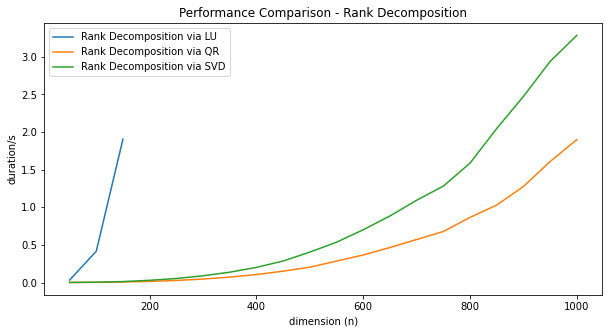

In [26]:
df = pd.DataFrame({
    "Rank Decomposition via LU" :   np.array([ min(row) for row in LU ]),
    "Rank Decomposition via QR" :   np.array([ row.min() for row in QR ]),
    "Rank Decomposition via SVD":   np.array([ row.min() for row in SVD]),
},index=X[1:])
df.plot(figsize=(10,5))
plt.ylabel("duration/s")
plt.xlabel("dimension (n)")
plt.title("Performance Comparison - Rank Decomposition")